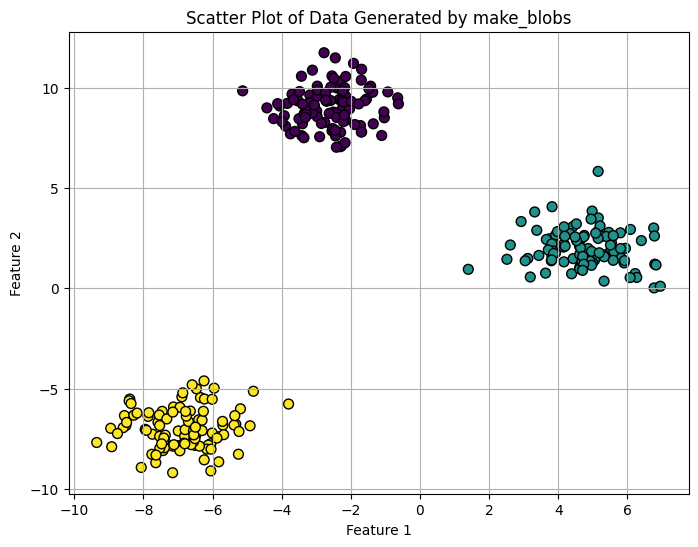

テストデータの精度: 1.00

分類レポート:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        35

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



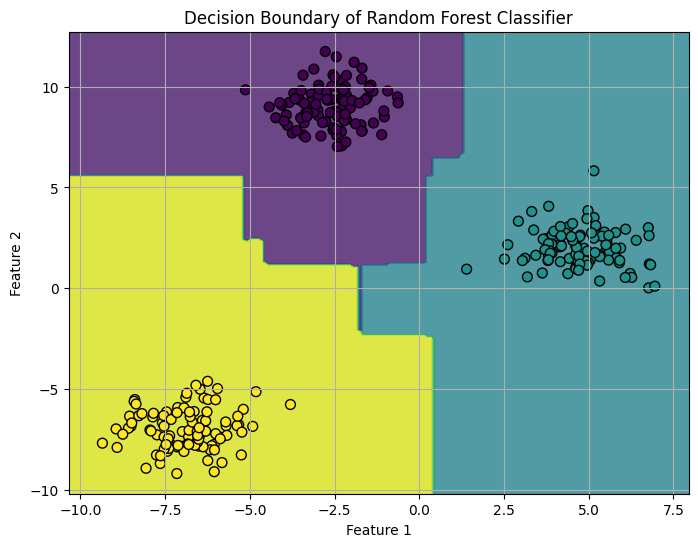

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. データ生成
X, y = make_blobs(
    n_samples=300,  # サンプル数
    centers=3,      # クラスタ数
    cluster_std=1.0,  # クラスタの標準偏差
    random_state=42
)

# データの可視化
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title("Scatter Plot of Data Generated by make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# 2. データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=100,     # 決定木の本数
    max_depth=None,       # 決定木の最大深さ（デフォルトで自動設定）
    random_state=42       # 再現性のための乱数シード
)

# 4. モデルの学習
rf_model.fit(X_train, y_train)

# 5. テストデータで予測
y_pred = rf_model.predict(X_test)

# 6. モデルの精度を計算
accuracy = accuracy_score(y_test, y_pred)
print(f"テストデータの精度: {accuracy:.2f}")
print("\n分類レポート:\n", classification_report(y_test, y_pred))

# 7. 決定境界のプロット
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

# 各点で予測
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 境界のプロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
plt.title("Decision Boundary of Random Forest Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
